# TetraVex Solver with PENNYLANE

In [20]:
from pennylane import qaoa
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

In [25]:
# Get the values & pieces from the TetraVex game
# Values are for visualization
# Pieces are for the algorithm
def getValuesAndPieces(file):
    north = []
    east = []
    south = []
    west = []
    pieces = {}
    i = 0
    for line in file:
        sides = line.split(" ")
        pieces[i] = [int(sides[0]), int(sides[1]), int(sides[2]), int(sides[3])]
        i += 1
        north.append([int(sides[0])])
        east.append([int(sides[1])])
        south.append([int(sides[2])])
        west.append([int(sides[3])])

    values = [north, east, south, west]
    print("values: " + str(values))
    print("pieces: " + str(pieces))
    return values, pieces

In [30]:
# Start board
sizeBoard = 3
file = open("./dataFiles/TetraVex_2x2.txt", "r")
values, pieces = getValuesAndPieces(file)

values: [[[8], [9], [1], [8]], [[9], [3], [8], [5]], [[1], [0], [1], [9]], [[4], [8], [8], [9]]]
pieces: {0: [8, 9, 1, 4], 1: [9, 3, 0, 8], 2: [1, 8, 1, 8], 3: [8, 5, 9, 9]}


(0, 0, 0): [(0, 2, 1), (1, 1, 1), (1, 2, 1), (2, 0, 1), (2, 1, 1), (2, 2, 1), (0, 2, 2), (1, 0, 2), (1, 1, 2), (1, 2, 2), (2, 0, 2), (2, 1, 2), (2, 2, 2), (0, 1, 3), (0, 2, 3), (1, 1, 3), (1, 2, 3), (2, 0, 3), (2, 1, 3), (2, 2, 3)]
(0, 1, 0): [(1, 0, 1), (1, 2, 1), (2, 0, 1), (2, 1, 1), (2, 2, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2), (2, 0, 2), (2, 1, 2), (2, 2, 2), (0, 2, 3), (1, 0, 3), (1, 2, 3), (2, 0, 3), (2, 1, 3), (2, 2, 3)]
(0, 2, 0): [(0, 0, 1), (1, 0, 1), (1, 1, 1), (2, 0, 1), (2, 1, 1), (2, 2, 1), (0, 0, 2), (1, 0, 2), (1, 1, 2), (1, 2, 2), (2, 0, 2), (2, 1, 2), (2, 2, 2), (0, 0, 3), (1, 0, 3), (1, 1, 3), (2, 0, 3), (2, 1, 3), (2, 2, 3)]
(1, 0, 0): [(0, 1, 1), (0, 2, 1), (1, 2, 1), (2, 1, 1), (2, 2, 1), (0, 1, 2), (0, 2, 2), (1, 2, 2), (2, 0, 2), (2, 1, 2), (2, 2, 2), (0, 1, 3), (0, 2, 3), (1, 1, 3), (1, 2, 3), (2, 1, 3), (2, 2, 3)]
(1, 1, 0): [(0, 0, 1), (0, 2, 1), (2, 0, 1), (2, 2, 1), (0, 0, 2), (0, 2, 2), (2, 0, 2), (2, 1, 2), (2, 2, 2), (0, 0, 3), (0, 2, 3), (1, 2, 3), (2, 0

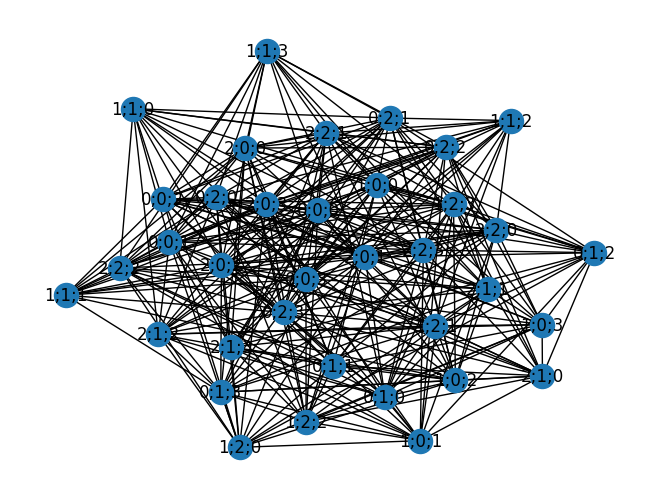

In [31]:
# Build Graph
size = len(pieces)
graph = {}
for piece1, colors1 in pieces.items():
    for row1 in range(sizeBoard):
        for col1 in range(sizeBoard):
            for piece2, colors2 in pieces.items():
                if piece1 == piece2:
                        continue
                for row2 in range(sizeBoard):
                    for col2 in range(sizeBoard): 
                        if row1 == row2 and col1 == col2:
                            continue
                        node1 = (row1, col1, piece1)
                        node2 = (row2, col2, piece2)

                        graph.setdefault(node1, []).append(node2)

                        if row1-1 == row2 and col1 == col2 \
                            and colors1[0] != colors2[2]:
                                graph[node1].remove(node2)

                        if row1 == row2-1 and col1 == col2 \
                            and colors1[2] != colors2[0]:
                                graph[node1].remove(node2)

                        if row1 == row2 and col1-1 == col2 \
                            and colors1[3] != colors2[1]:
                                graph[node1].remove(node2)   

                        if row1 == row2 and col1 == col2-1 \
                            and colors1[1] != colors2[3]:
                                graph[node1].remove(node2) 

for node, edges in graph.items():
    print(str(node) + ": " + str(edges))
G = nx.Graph()
for node, edges in graph.items():
    for edge in edges:
        nodeStr = str(node[0]) + ";" + str(node[1]) + ";" + str(node[2])
        edgeStr = str(edge[0]) + ";" + str(edge[1]) + ";" + str(edge[2])
        G.add_edge(nodeStr, edgeStr)
nx.draw(G, with_labels = True)
plt.show()

In [32]:
cost_h, mixer_h = qaoa.max_clique(G, constrained=False)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-14.75) [Z1;1;0]
+ (-14.75) [Z1;1;1]
+ (-14.75) [Z1;1;2]
+ (-14.75) [Z1;1;3]
+ (-13.25) [Z1;0;1]
+ (-13.25) [Z1;0;3]
+ (-13.25) [Z0;1;1]
+ (-13.25) [Z0;1;2]
+ (-13.25) [Z1;2;0]
+ (-13.25) [Z2;1;0]
+ (-13.25) [Z1;2;2]
+ (-13.25) [Z2;1;3]
+ (-12.5) [Z0;1;0]
+ (-12.5) [Z1;0;0]
+ (-12.5) [Z1;2;1]
+ (-12.5) [Z2;1;1]
+ (-12.5) [Z0;1;3]
+ (-12.5) [Z1;2;3]
+ (-12.5) [Z2;1;2]
+ (-12.5) [Z1;0;2]
+ (-11.75) [Z0;0;1]
+ (-11.75) [Z2;2;0]
+ (-11.75) [Z0;2;2]
+ (-11.75) [Z2;0;3]
+ (-11.0) [Z0;2;0]
+ (-11.0) [Z0;0;2]
+ (-11.0) [Z0;0;3]
+ (-11.0) [Z2;0;0]
+ (-11.0) [Z0;2;1]
+ (-11.0) [Z2;0;1]
+ (-11.0) [Z2;2;2]
+ (-11.0) [Z2;2;3]
+ (-10.25) [Z0;0;0]
+ (-10.25) [Z2;2;1]
+ (-10.25) [Z0;2;3]
+ (-10.25) [Z2;0;2]
+ (0.75) [Z0;0;0 Z0;1;0]
+ (0.75) [Z0;0;0 Z1;0;1]
+ (0.75) [Z0;0;0 Z1;0;3]
+ (0.75) [Z0;0;0 Z0;2;0]
+ (0.75) [Z0;0;0 Z0;0;1]
+ (0.75) [Z0;0;0 Z0;0;2]
+ (0.75) [Z0;0;0 Z0;0;3]
+ (0.75) [Z0;0;0 Z1;0;0]
+ (0.75) [Z0;0;0 Z0;1;1]
+ (0.75) [Z0;0;0 Z0;1;2]
+ (0.75) [Z0;0;0 Z1;1;0]
+ (0

In [33]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [34]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])

In [35]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [36]:
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

In [37]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

WireError: Cannot run circuit(s) on default.qubit as they contain wires not found on the device: {'2;1;2', '2;1;1', '0;2;3', '1;0;0', '1;2;1', '0;2;2', '2;0;0', '0;0;2', '1;1;2', '0;2;1', '2;1;0', '0;1;1', '2;0;2', '1;1;0', '0;0;0', '2;1;3', '1;0;2', '1;1;3', '2;2;2', '0;0;1', '0;1;3', '1;1;1', '2;2;1', '2;0;3', '1;0;1', '2;0;1', '1;2;0', '0;0;3', '0;2;0', '1;0;3', '0;1;2', '2;2;3', '2;2;0', '1;2;2', '1;2;3', '0;1;0'}

In [17]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

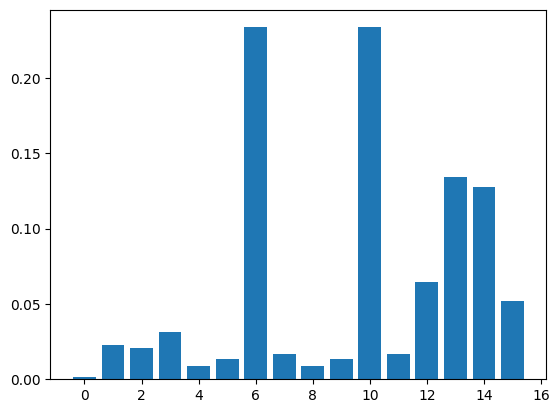

In [19]:
plt.bar(range(2 ** len(wires)), probs)
plt.show()